In [2]:
import pandas as pd
import numpy as np

import pymc3 as pm
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot
%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\fmedeiros\.conda\envs\cs109b\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [9]:
df = pd.read_csv('../data/data3.csv')
df.head()

,x,y
0,2.875775,0.223825
1,7.883051,6.118438
2,4.089769,2.167730
3,8.830174,5.868317
4,9.404673,7.333365


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [tau, alpha]
Sampling 2 chains, 2,532 divergences: 100%|████████████████████████████████████| 8000/8000 [00:50<00:00, 157.17draws/s]
There were 1217 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1314 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


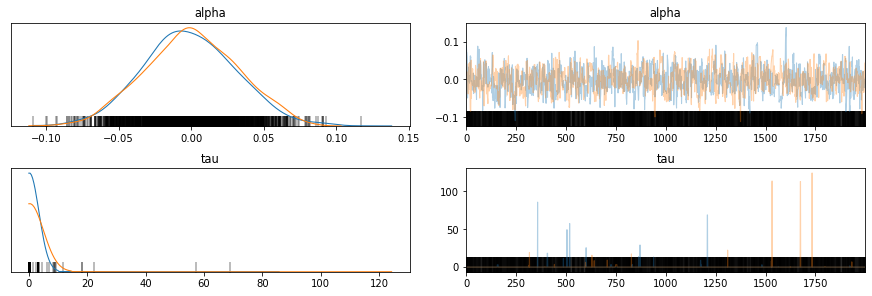

In [10]:
### edTest(test_pm_model) ###
np.random.seed(109)
with pm.Model() as model:
   #Set priors for unknown model parameters
   alpha = pm.Normal('alpha',mu=0,tau=1000)
   
   # Likelihood (sampling distribution) of observations
   tau_obs = pm.Gamma('tau', alpha=0.001, beta=0.001)
   #obs = pm.Normal(____________) #Parameters to set: name, mu, tau, observed
   obs = pm.Normal('y', mu=df.x.mean(), sd=df.x.std(), observed=df.y) #Parameters to set: name, mu, tau, observed
   # create trace plots 
   trace = pm.sample(2000, tune=2000)
   pm.traceplot(trace, compact=False);


In [11]:
#posterior means
np.mean(trace['alpha']) , np.mean(trace['tau'])

(-0.0008744797548835737, 0.33823297984436657)